In [1]:
# Importing some important Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv(r"C:\Users\aakas\Documents\DataSets\competetion\titanic\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_data.shape)

(891, 12)


In [5]:
train_data.info()
# Dropping the cabin vaiables as 80% of the data is missing.
# Embarked has 2 values missing so will drop these 2 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data visualization

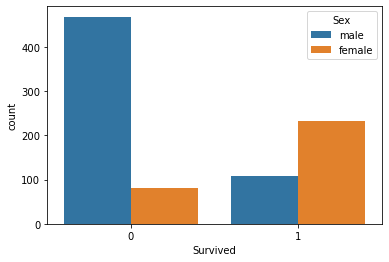

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

This chart shows that more female survived than male. 0 representing dead and 1 representing survived.

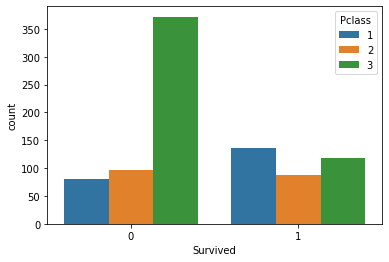

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

The Chart tells that the 3rd class passenger more likely died.

1st class passenger survived slighty more than other class.

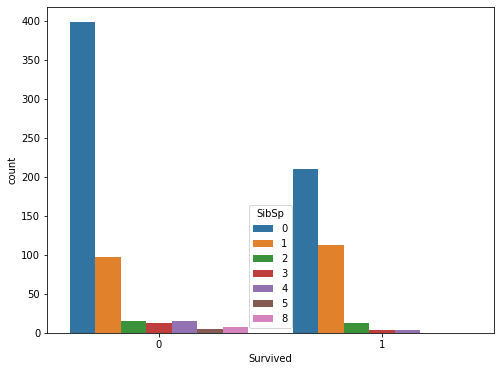

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='SibSp',data=train_data)

Chart shows that passenger who were alone more likely died. 

Also passenger who were traveling with more than 2 siblings mostly survived.

In [9]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

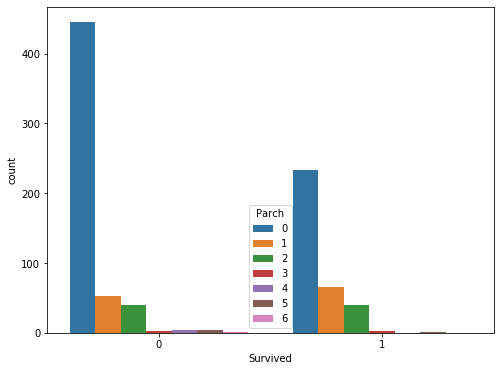

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='Parch',data=train_data)

The chart shows that person who boarded with two or more children/parents more likely survived.

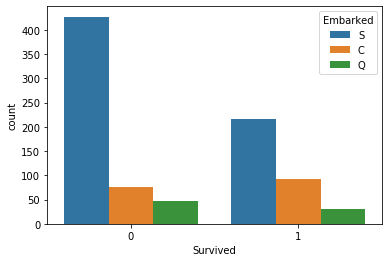

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=train_data)

The chart shows a slight differnce in C passengers showing that a little more C passengers survived. Same with Q.

Also, S passengers more likely died.

## Feature Engineering
### Dealing with missing data

In [12]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### As Cabin column has almost 80% of the data missing, so its better to drop that column.

#### And the Embarked column has 2 missing values in train_data so we will drop those two rows.

#### We will try to fill the age column using other column.

In [13]:
train_data.drop('Cabin',axis=1,inplace=True)

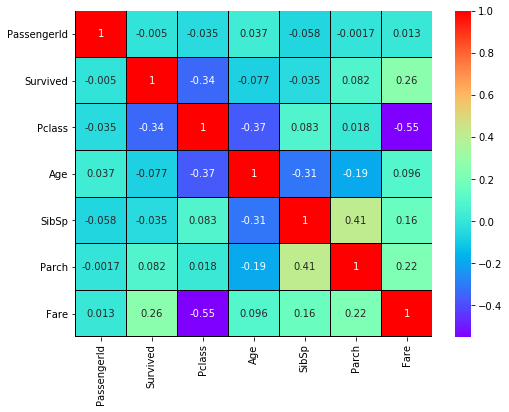

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(),annot=True,cmap='rainbow',linewidths=.02,linecolor='black')

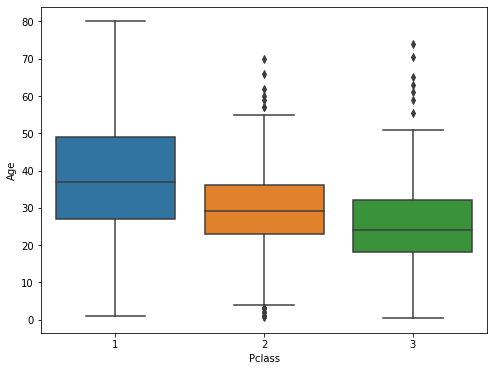

In [15]:
# As the age is correlated to only two columns and we will be using Pclass. Most of the times wealthier people are more aged.
# So we will use Pclass column to fill the Age column. Boxplot chart shows further explanation.

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train_data)

The chart shows that rich people in 1st class are much older, which does make sense in real world.
##### 1st class passengers have median age of 37
##### 2nd class passengers have median age of 29
##### And 3rd class passengers have median age of around 23
So we will use Pclass column to fill the age column.

In [16]:
def age_fill(i):
    Pclass = i[0]
    Age= i[0]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 23
    else:
        return Age
    # Otherwise return the original age which is given.

In [17]:
# lets apply function to the data.
train_data['Age'] = train_data[['Age','Pclass']].apply(age_fill,axis=1)

In [18]:
# For Embarked column which has 2 missing values we will drop those 2 rows.
train_data.dropna(inplace=True)

In [19]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Categorical Data
 
We will be creating dummy variables for variables like: Sex, Embarked

In [20]:
# Getting Dummy Variables.
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first = True)

In [21]:
# Concating all dataframes together and dropping the origianl Sex and Embarked columns.
train_data = pd.concat([sex,embark,train_data],axis=1)
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)

We don't need column Name because the Sex and Age of the passengers are already given so we don't need to collect Titles like Mr., Mrs., Miss.

Also, we don't need the columns Fare and Ticket.

In [22]:
train_data.drop(['Name','Fare','Ticket'],axis=1,inplace=True)
train_data.head()

,male,Q,S,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,1,1,0,3,22.0,1,0
1,0,0,0,2,1,1,38.0,1,0
2,0,0,1,3,1,3,26.0,0,0
3,0,0,1,4,1,1,35.0,1,0
4,1,0,1,5,0,3,35.0,0,0


## Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logR = LogisticRegression(max_iter=5000)

In [28]:
logR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions = logR.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report

In [31]:
print('Accuracy Score = ', accuracy_score(y_test,predictions)*100)
print('\n')
print(classification_report(y_test,predictions))

Accuracy Score =  81.46067415730337


              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



### Preparing Submissioin file using above model.

In [34]:
# Importing the fresh data for predicting the survival using the trained model.
test_d = pd.read_csv(r"C:\Users\aakas\Documents\DataSets\competetion\titanic\test.csv")

In [35]:
# Dropping the unwanted columns.
test_d.drop(['Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

# Getting dummies/one-hot-encoding for the categorical data.
Sex = pd.get_dummies(test_d['Sex'],drop_first=True)
Embark = pd.get_dummies(test_d['Embarked'],drop_first=True)

test_d = pd.concat([Sex, Embark , test_d],axis=1)
test_d.drop(['Sex','Embarked'],axis=1,inplace=True)

In [36]:
# Creating function to fill the missing values.
def age_fills(i):
    Pclass = i[0]
    Age= i[0]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 42
        elif Pclass ==2:
            return 27
        else:
            return 23
    else:
        return Age

In [37]:
test_d['Age'] = test_d[['Pclass','Age']].apply(age_fills,axis=1)

In [38]:
predicitions_test = logR.predict(test_d)
predicitions_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [39]:
Submission = pd.DataFrame({'PassengerID':test_d['PassengerId'], 'Survived':predicitions_test})
Submission.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


In [111]:
# Saving the file for submitting in the competetion.
filename= 'Titanic Predicitions'
Submission.to_csv(filename, index=False)